# Grundlagen der Digitalen Signalverarbeitung

In [17]:
import matplotlib.pyplot as plt
import IPython.display as ipd #Regler für die Audiowiedergabe
from scipy import signal #SciPy für die Signalverarbeitung
from scipy.io import wavfile
import scipy
import numpy as np
from scipy.fftpack import fft

## Einlesen einer Audidatei
 Bei der Audidatei handelt es sich um eine Tonaufnahme des Wälzlagerprüfstands.
* Installieren Sie hierfür das Paket Librosa: conda install -c conda-forge librosa
* Laden Sie die Datei Lager_test_RPM2000_Nr(2).wav ein

In [18]:
import librosa
#Einlesen einer Wave Datei
AudioData, freq = librosa.load('data/Lager_test_RPM2000_Nr(2).wav', mono=True)
# Berechnen Sie die Abtastrate mit der das Signal aufgenommen wurde:
length = len(AudioData)/freq #Formel?
print('Abtastfrequenz: {} Abspieldauer: {} '.format(freq, length))
len(AudioData)

Abtastfrequenz: 22050 Abspieldauer: 10.95981859410431 


241664

Text(0.5, 1.0, 'Titel')

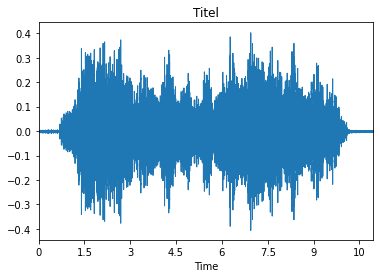

In [19]:
import librosa.display
%matplotlib inline
#Erstellen Sie ein Diagramm über die Audiodatei
librosa.display.waveplot(AudioData, sr=freq)
plt.title('Titel')

## Hörprobe des Signals

In [20]:
ipd.Audio(AudioData, rate=freq)

## Anwendung selektiver Filter (Tiefpass, Hochpass)

Syntx: 
scipy.signal.butter(N, Wn, btype='low', analog=False, output='ba', fs=None)
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html#scipy.signal.butter

In [21]:
b, a = signal.butter(5, 300/ (freq), 'low', analog = False) #Die Frequenz über 300 Hz abgeschnitten
Filter = signal.filtfilt(b, a, AudioData)
ipd.Audio(Filter, rate=freq)

## Spektrogramme zur Darstellung und Vergleich von Signalen

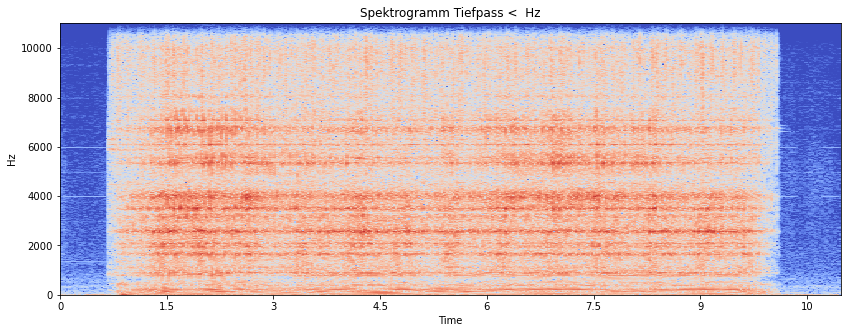

In [22]:
X = librosa.stft(AudioData)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=freq, x_axis='time', y_axis='hz')
plt.title('Spektrogramm Tiefpass <  Hz')
plt.savefig('Spektrogramm.png')
plt.show()

# Frequenzanalysen und Window-Funktionen

## Erstellen eines Signals

* Erstellen Sie ganzzahlige und nicht ganzzahlige Frequenzen.
* Erstellen Sie dafür je eine FFT und erstellen Sie nur ein Diagramm für beide. Was fällt Ihnen auf?

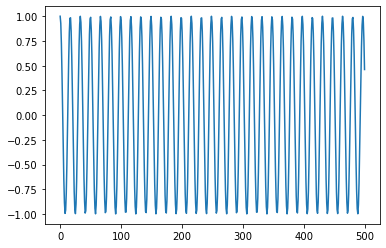

In [23]:
fs = 500 # Abtastrate
f = 30.234230234 # Frequenz des Signals
# = 30 # Frequenz des Signals

x = np.arange(fs) # Laufweite der Punkte für den Plot
# Erstellung der Werte für die Cosinusfunktion
y = [ np.cos(2*np.pi*f * (i/fs)) for i in x]


%matplotlib inline

#plt.stem(x,y, 'r', ) # Anzeigen der exakten Position jedes Messwertes
plt.plot(x,y)

## Hörprobe des Signal

In [24]:
FS = fs # Sampling rate
ipd.Audio(y, rate=FS)

## Erstellen einer FFT

In [25]:
f_s = fs # Frequenz der Daten
fft_x = np.fft.fft(y) #Datenwerte/Funktion

Text(0, 0.5, 'Amplitude')

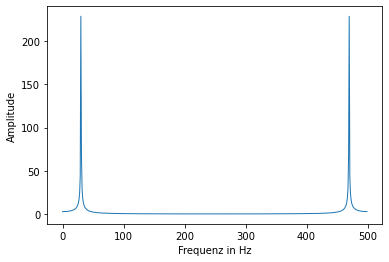

In [26]:
%matplotlib inline
plt.plot(np.abs(fft_x), linewidth=1)
plt.xlabel('Frequenz in Hz')
plt.ylabel('Amplitude')

## Fensterfunktionen

* Versuchen Sie Ihren Frequenzbereich zu verfeinern über geeignete Fensterfunktionen.
* Recherchieren Sie dafür in SciPy nach Fensterfunktionen.
* Wie werden die Fensterfunktionen auf die ursprüngliche Funktion angewendet. Werfen Sie dafür einen Blick in Ihre Unterlagen.
* Erstellen Sie Diagramme um die jeweiligen Funktionen gegenüberzustellen.
* Erstellen Sie mit den gefensterten Funktionen Fourier Transformationen Diagramme und vergleichen Sie diese mit der Grundfunktion.

In [27]:
window = signal.windows.flattop(len(y))

### Anwenden der Fensterfunktion

In [28]:
# Wie kann die Fensterfunktion angewendet werden? Siehe Skript.
y_window = y * window

In [29]:
f_s = fs
fft_x_window = np.fft.fft(y_window)
n = len(y_window)
freq = np.fft.fftfreq(n, 1/f_s)

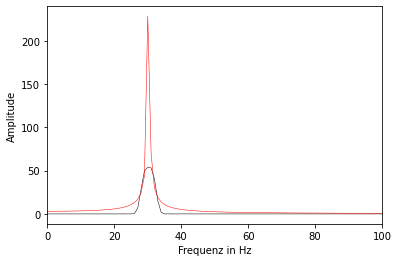

In [30]:
%matplotlib inline
plt.plot(np.abs(fft_x_window),color='black', linewidth=0.5)
plt.plot(np.abs(fft_x),color='red', linewidth=0.5) #ohne Windowing
plt.xlabel('Frequenz in Hz')
plt.ylabel('Amplitude')
plt.xlim([0,100])
plt.show()

##  Root Mean Square (RMS) als Möglichkeit der Signalbeschreibung

In [31]:
from numpy import mean, sqrt, square, arange
#a = arange(10) # For example
rms = sqrt(mean(square(Filter)))
rms

0.0049981265623677985

## Erstellen des Spektrogramms des erzeugten Signals.
* Variieren Sie die Paramater des Signals und die Filter, wie verändert sich das Spektrogramm

C:\Users\games\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=500
  warnings.warn(


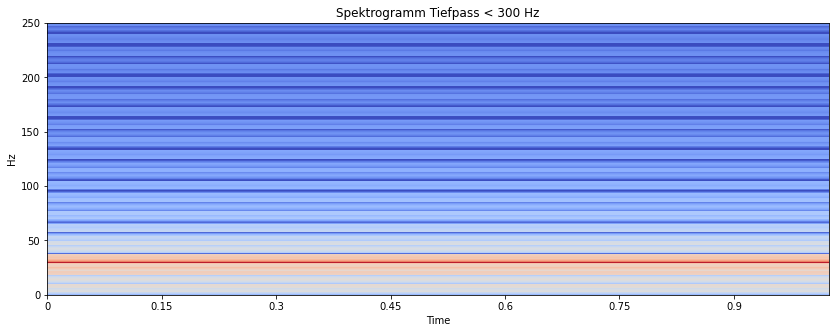

In [32]:
%matplotlib inline
import librosa.display
ynp = np.array(y)
X = librosa.stft(ynp) # Test mit und ohne Window, Ohne Window nur y nichts zu erkennen.
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=fs, x_axis='time', y_axis='hz')
plt.title('Spektrogramm Tiefpass < 300 Hz')
plt.savefig('Spektrogramm.png')
plt.show()

# Frequenzanalyse der Audiodateien

Laden Sie die beiden weiteren Dateien ein und erstellen Sie ein Diagramm über alle 3 Datensätze:
* Lager_test_RPM2000_Nr(2).wav
* Lager_test_RPM3000_Nr(2).wav
* Lager_test_RPM4000_Nr(2).wav
* Arbeiten Sie die Unterschiede der 3 Signal möglichst deutlich heraus.
* Nutzen Sie dafür:
    * Filter
    * Fensterfunktionen
    * FFT
    * Diagramme
    * RMS

In [33]:
AudioData2000, freq2000 = librosa.load('data/Lager_test_RPM2000_Nr(2).wav', mono=True)
AudioData3000, freq3000 = librosa.load('data/Lager_test_RPM3000_Nr(2).wav', mono=True)
AudioData4000, freq4000 = librosa.load('data/Lager_test_RPM4000_Nr(2).wav', mono=True)

In [34]:
# Lager 2000 RPM
b, a = signal.butter(6, 150/ (freq2000), 'low', analog = False) #Die Frequenz über 300 Hz abgeschnitten
Filter2000 = signal.filtfilt(b, a, AudioData2000)
ipd.Audio(Filter2000, rate=freq2000)
# Lager 3000 RPM
b, a = signal.butter(6, 150/ (freq3000), 'low', analog = False) #Die Frequenz über 300 Hz abgeschnitten
Filter3000 = signal.filtfilt(b, a, AudioData3000)
ipd.Audio(Filter3000, rate=freq3000)
# Lager 4000 RPM
b, a = signal.butter(6, 150/ (freq4000), 'low', analog = False) #Die Frequenz über 300 Hz abgeschnitten
Filter4000 = signal.filtfilt(b, a, AudioData4000)
ipd.Audio(Filter4000, rate=freq4000)

In [35]:
# Lager 2000
f_s = freq2000 # Frequenz der Daten
fft_AudioData2000 = np.fft.fft(Filter2000) #Datenwerte/Funktion
# Lager 3000
f_s = freq3000 # Frequenz der Daten
fft_AudioData3000 = np.fft.fft(Filter3000) #Datenwerte/Funktion
# Lager 4000
f_s = freq4000 # Frequenz der Daten
fft_AudioData4000 = np.fft.fft(Filter4000) #Datenwerte/Funktion

In [36]:
# Lager 2000
window_Freq2000 = signal.windows.flattop(len(AudioData2000))
AudioData_Window2000 = Filter2000* window_Freq2000
f_s = freq2000 # Frequenz der Daten
fft_AudioData_window2000 = np.fft.fft(AudioData_Window2000) #Datenwerte/Funktion
# Lager 3000
window_Freq3000 = signal.windows.flattop(len(AudioData3000))
AudioData_Window3000 = Filter3000* window_Freq3000
f_s = freq3000 # Frequenz der Daten
fft_AudioData_window3000 = np.fft.fft(AudioData_Window3000) #Datenwerte/Funktion
# Lager 4000
window_Freq4000 = signal.windows.flattop(len(AudioData4000))
AudioData_Window4000 = Filter4000* window_Freq4000
f_s = freq4000 # Frequenz der Daten
fft_AudioData_window4000 = np.fft.fft(AudioData_Window4000) #Datenwerte/Funktion

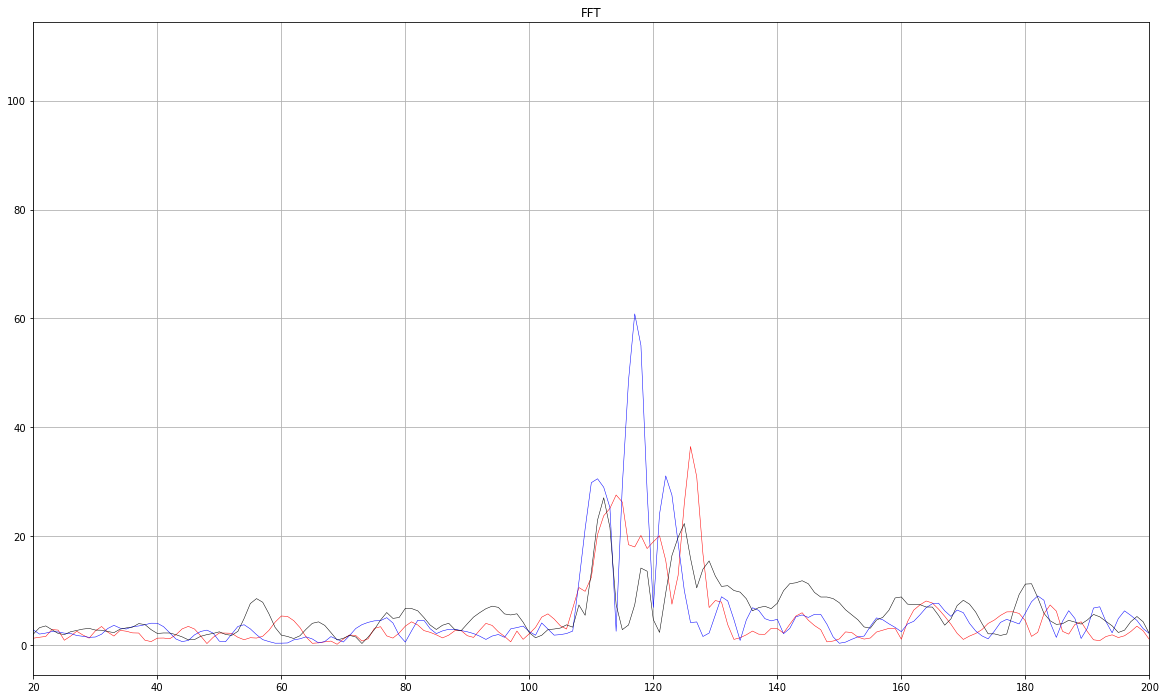

In [37]:
%matplotlib inline
fig = plt.figure(figsize=(20,12))

#signal_axes = fig.add_subplot(211)
#signal_axes.plot(xs,rawsignal)
fft_axes = fig.add_subplot(1,1,1)
fft_axes.set_title("FFT")
fft_axes.set_autoscaley_on(True)
#fft_axes.set_ylim([0,200])
fft_axes.set_xlim([20,200])
#fft_axes.plot(abs(fft_AudioData))
#fft_axes.plot(abs(fft_AudioData))
plt.plot(np.abs(fft_AudioData_window2000),color='red', linewidth=0.5)
plt.plot(np.abs(fft_AudioData_window3000),color='blue', linewidth=0.5)
plt.plot(np.abs(fft_AudioData_window4000),color='black', linewidth=0.5)
#fft_axes.set_xticks(np.arange(0, 1000, 10))
plt.grid(True)
plt.show()

In [38]:
from numpy import mean, sqrt, square, arange
#a = arange(10) # For example
rms2000 = sqrt(mean(square(Filter2000)))
rms2000

0.0032225393909391478

In [39]:
rms3000 = sqrt(mean(square(Filter3000)))
rms3000

0.005128233732888791

In [40]:
rms4000 = sqrt(mean(square(Filter4000)))
rms4000

0.007464473747604722

In [41]:
rms3000-rms2000

0.001905694341949643

In [42]:
rms4000-rms3000

0.0023362400147159314

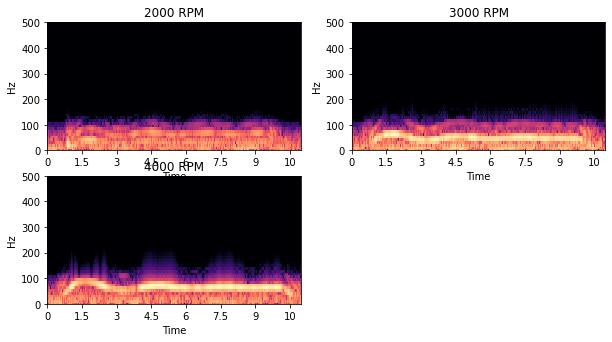

In [43]:
# Plot 
plt.figure(figsize=(10, 8))
ynp = np.array(Filter2000)
X = librosa.stft(ynp) # Test mit und ohne Window, Ohne Window nur y nichts zu erkennen.
Xdb = librosa.amplitude_to_db(abs(X))
#plt.figure(figsize=(14, 5))
plt.subplot(321)
librosa.display.specshow(Xdb, sr=freq2000, x_axis='time', y_axis='hz')
plt.ylim([0,500])
plt.title('2000 RPM')
plt.savefig('Spektrogramm.png')
# Plot 2
ynp = np.array(Filter3000)
X = librosa.stft(ynp) # Test mit und ohne Window, Ohne Window nur y nichts zu erkennen.
Xdb = librosa.amplitude_to_db(abs(X))
#plt.figure(figsize=(14, 5))
plt.subplot(322)
librosa.display.specshow(Xdb, sr=freq3000, x_axis='time', y_axis='hz')
plt.ylim([0,500])
plt.title('3000 RPM')
plt.savefig('Spektrogramm.png')
# Plot 3
ynp = np.array(Filter4000)
X = librosa.stft(ynp) # Test mit und ohne Window, Ohne Window nur y nichts zu erkennen.
Xdb = librosa.amplitude_to_db(abs(X))
#plt.figure(figsize=(14, 5))
plt.subplot(323)
librosa.display.specshow(Xdb, sr=freq4000, x_axis='time', y_axis='hz')
plt.ylim([0,500])
plt.title('4000 RPM')
plt.savefig('Spektrogramm.png')